In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Baza danych pobrana

In [164]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.shape
# df.head()

(5416, 14)

In [165]:
df['date'] = pd.to_datetime(df['date'])

In [166]:
df['week_day'] = df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,week_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


### 2. Baza danych przekształcona aby pokazać oznaki choroby psychicznej według rasy

In [167]:
pivot = df.pivot_table(values='id',index='race',columns='signs_of_mental_illness', aggfunc=np.count_nonzero)
pivot

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [168]:
pivot.columns = ['False', 'True']
pivot

,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [169]:
pivot.reset_index(inplace=True)
pivot

,race,False,True
0,A,69,24
1,B,1114,184
2,H,745,157
3,N,64,14
4,O,37,11
5,W,1763,713


In [170]:
pivot.set_index('race', inplace=True)
pivot

,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


### 3. Odsetek ofiar z oznakami choroby psychicznej

In [171]:
def mentail_ill(x):
    y = round((x['True'] / (x['False'] + x['True'])) * 100, 1)
    return y

In [172]:
pivot['%of_mentail_ill'] = pivot.apply(lambda x: mentail_ill(x), axis=1)
pivot

,False,True,%of_mentail_ill
race,,,
A,69,24,25.8
B,1114,184,14.2
H,745,157,17.4
N,64,14,17.9
O,37,11,22.9
W,1763,713,28.8


### 4. Dodane dni tygodnia, w których doszło do interwencji oraz posegregowane

In [173]:
ordered_days_of_weel = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [174]:
pivot2 = df.pivot_table(values='id',index='week_day', aggfunc=np.count_nonzero)
pivot2.reset_index(inplace=True)

In [175]:
pivot2.rename(columns={'id': 'Interventions'}, inplace=True)

In [176]:
pivot2

,week_day,Interventions
0,Friday,761
1,Monday,726
2,Saturday,721
3,Sunday,753
4,Thursday,810
5,Tuesday,816
6,Wednesday,829


In [177]:
pivot2['week_day'] = pd.Categorical(pivot2['week_day'], categories=ordered_days_of_weel, ordered=True)
pivot2 = pivot2.sort_values('week_day')

In [178]:
pivot2

,week_day,Interventions
1,Monday,726
5,Tuesday,816
6,Wednesday,829
4,Thursday,810
0,Friday,761
2,Saturday,721
3,Sunday,753


<BarContainer object of 7 artists>

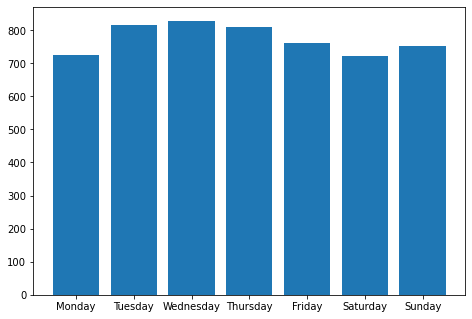

In [179]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.bar(pivot2['week_day'], pivot2['Interventions'])

### 5. Dodanie baz danych z danycmi dotyczącymi populacji oraz skrótów poszczególnych stanów. Następnie wyliczony odsetek interwencji na 1000 mieszkańców.

In [180]:
fields = ['State', 'Population estimate, July 1, 2019']

In [181]:
df2 = pd.read_csv('states_by_population.csv',sep=';',usecols=fields, encoding='cp1252')
df2.head()

,State,"Population estimate, July 1, 2019"
0,Northern Mariana Islands,"55,194"
1,American Samoa,"55,641"
2,U.S. Virgin Islands,"104,914"
3,Guam,"165,718"
4,Wyoming,"578,759"


In [182]:
df3 = pd.read_csv('state_and_territory_abbreviations.csv',sep=';', encoding='cp1252')
df3.drop(['Unnamed: 1', 'ISO', 'Unnamed: 4', 'USPS', 'USCG', 'GPO', 'AP', 'Other'], axis=1, inplace=True)
df3.set_index('ANSI', inplace=True)

In [183]:
df3.head()

,Name and status of region
ANSI,
US,United States of America
AL,Alabama
AK,Alaska
AZ,Arizona
AR,Arkansas


In [184]:
df.set_index('state', inplace=True)

In [185]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,week_day
state,,,,,,,,,,,,,,
WA,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,True,attack,Not fleeing,False,Friday
OR,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,False,attack,Not fleeing,False,Friday
KS,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,False,other,Not fleeing,False,Saturday
CA,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,True,attack,Not fleeing,False,Sunday
CO,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,False,attack,Not fleeing,False,Sunday


In [186]:
df = df.join(df3, on='state', how='left')

In [187]:
df.reset_index(inplace=True)

In [188]:
df2.set_index('State', inplace=True)

In [189]:
df2.head()

,"Population estimate, July 1, 2019"
State,
Northern Mariana Islands,"55,194"
American Samoa,"55,641"
U.S. Virgin Islands,"104,914"
Guam,"165,718"
Wyoming,"578,759"


In [190]:
df.set_index('Name and status of region', inplace=True)

In [191]:
df.head()

,state,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,week_day
Name and status of region,,,,,,,,,,,,,,,
Washington,WA,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,True,attack,Not fleeing,False,Friday
Oregon,OR,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,False,attack,Not fleeing,False,Friday
Kansas,KS,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,False,other,Not fleeing,False,Saturday
California,CA,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,True,attack,Not fleeing,False,Sunday
Colorado,CO,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,False,attack,Not fleeing,False,Sunday


In [192]:
df = df.join(df2, on='Name and status of region', how='left')

In [193]:
df.head()

,state,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,week_day,"Population estimate, July 1, 2019"
Name and status of region,,,,,,,,,,,,,,,,
Washington,WA,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,True,attack,Not fleeing,False,Friday,"7,614,893"
Oregon,OR,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,False,attack,Not fleeing,False,Friday,"4,217,737"
Kansas,KS,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,False,other,Not fleeing,False,Saturday,"2,913,314"
California,CA,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,True,attack,Not fleeing,False,Sunday,"39,512,223"
Colorado,CO,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,False,attack,Not fleeing,False,Sunday,"5,758,736"


In [194]:
df.reset_index(inplace=True)

In [195]:
df.head()

,Name and status of region,state,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,week_day,"Population estimate, July 1, 2019"
0,Washington,WA,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,True,attack,Not fleeing,False,Friday,"7,614,893"
1,Oregon,OR,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,False,attack,Not fleeing,False,Friday,"4,217,737"
2,Kansas,KS,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,False,other,Not fleeing,False,Saturday,"2,913,314"
3,California,CA,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,True,attack,Not fleeing,False,Sunday,"39,512,223"
4,Colorado,CO,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,False,attack,Not fleeing,False,Sunday,"5,758,736"


In [196]:
df = df.replace(',','', regex=True)

In [197]:
df['Population estimate, July 1, 2019'] = pd.to_numeric(df['Population estimate, July 1, 2019'])

In [198]:
df.head()

,Name and status of region,state,id,name,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,week_day,"Population estimate, July 1, 2019"
0,Washington,WA,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,True,attack,Not fleeing,False,Friday,7614893
1,Oregon,OR,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,False,attack,Not fleeing,False,Friday,4217737
2,Kansas,KS,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,False,other,Not fleeing,False,Saturday,2913314
3,California,CA,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,True,attack,Not fleeing,False,Sunday,39512223
4,Colorado,CO,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,False,attack,Not fleeing,False,Sunday,5758736


In [199]:
pivot3 = df.pivot_table(values=['id', 'Population estimate, July 1, 2019'], 
                        index=['Name and status of region'], 
                        aggfunc={'id': np.count_nonzero,'Population estimate, July 1, 2019': np.mean})
pivot3.head()

,"Population estimate, July 1, 2019",id
Name and status of region,,
Alabama,4903185,104
Alaska,731545,39
Arizona,7278717,254
Arkansas,3017825,83
California,39512223,799


In [200]:
pivot3.reset_index(inplace=True)

In [201]:
pivot3.rename(columns={'id': 'Interventions'}, inplace=True)

In [202]:
pivot3.head()

,Name and status of region,"Population estimate, July 1, 2019",Interventions
0,Alabama,4903185,104
1,Alaska,731545,39
2,Arizona,7278717,254
3,Arkansas,3017825,83
4,California,39512223,799


In [203]:
def deaths_for_1000(x):
    y = round(((x['Interventions'] / x['Population estimate, July 1, 2019']) * 1000) * 100, 1)
    return y

In [204]:
pivot3['%of_death_for_1000_citizens'] = pivot3.apply(lambda x: deaths_for_1000(x), axis=1)

In [205]:
pivot3.head()

,Name and status of region,"Population estimate, July 1, 2019",Interventions,%of_death_for_1000_citizens
0,Alabama,4903185,104,2.1
1,Alaska,731545,39,5.3
2,Arizona,7278717,254,3.5
3,Arkansas,3017825,83,2.8
4,California,39512223,799,2.0
